#### ML + DL 첫 걸음
머신러닝 : 
기계 자체가 데이터를 통해 학습하여 특정 작업을 수행하는 것
기존 알고리즘 (e.g 정렬 알고리즘) 과는 달리 근사 알고리즘에 해당

데이터 사이언스 : 데이터를 분석하고 해석하여 지식과 통찰력을 얻는 학문
데이터 사이언스 = 통계추론 + 머신러닝
##### 우리의 스터디는 데이터 사이언스에서의 머신러닝에 초점을 맞춰서 진행할 것.


#### 오늘의 첫 주제는 선형 회귀 (Linear Regression)

#### 회귀 분석이란?
여러 자료들 간의 관계성을 수학적으로 추정, 설명하는 방식
그 중 선형 회귀를 한다는 건, 주어진 데이터를 가장 잘 설명하는 선형 함수를 구한다는 것.


신체 검사를 통해 병역 판정을 할 때의 급수를 판정하게 되는데 이를 벡터로 표현하면 다음과 같이 표현할 수 있습니다.

$x^T=[170,70,1]$

이처럼 우리는 각 데이터를 벡터로 나타낼 수 있습니다.

xy 평면에서 우리가 예측하고자 하는 값을 y, 그에 대한 예측값을 $\hat{y}$라고 할 때, 우리는 다음과 같이 나타낼 수 있습니다.

$\hat{y}=ax + b$


이와 동일하게, 우리는 여러 독립 변수들로 이루어진 데이터에 대해서도 행렬을 통해 나타낼 수 있습니다.

Estimated coefficients: [4.21509616 2.77011339]


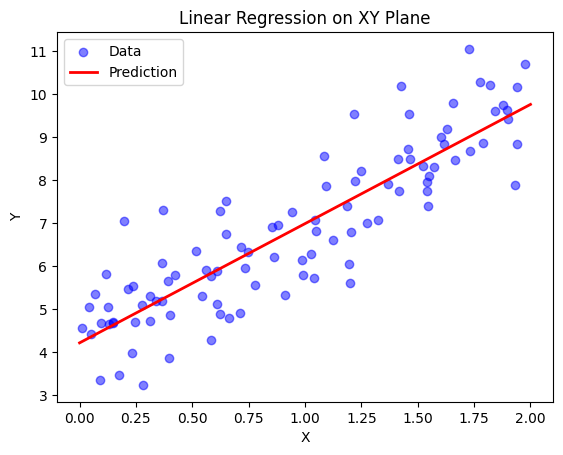

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 랜덤한 2D 데이터 생성
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # X 값 (0~2 사이의 난수)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + 노이즈 추가

# X에 절편 추가 (X_b = [1, X])
X_b = np.c_[np.ones((100, 1)), X]  # X_b = [1, x] 형태

# 정규 방정식으로 선형 회귀 계수 계산
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

# 예측 수행
x_new = np.linspace(0, 2, 100).reshape(-1, 1)
X_new_b = np.c_[np.ones((100, 1)), x_new]
y_predict = X_new_b @ theta_best

# 결과 출력
print(f"Estimated coefficients: {theta_best.ravel()}")  # 기울기와 절편

# 그래프 시각화
plt.scatter(X, y, color="blue", alpha=0.5, label="Data")
plt.plot(x_new, y_predict, "r-", linewidth=2, label="Prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression on XY Plane")
plt.show()


여기서는 간단하게 역행렬을 활용해서 처리했지만, 현실에서는 각 특성 간의 상관관계가 존재하는, 다중공산성 (Multicollinearity) 문제가 존재.

현실에서는 다중공산성이 아예 없는 경우를 찾기 어렵기 때문에, 이를 처리하기 위해 SVD (특이값 분해)를 통해 해결하거나 PCA 등 벡터 차원을 압축하는 방식으로 해결

또는 Gradient Descent 방식으로 근사 시켜서 처리

epoch : 1000, Loss : 0.9401206970214844
epoch : 2000, Loss : 0.8705447316169739
epoch : 3000, Loss : 0.8390207886695862
epoch : 4000, Loss : 0.8230343461036682
epoch : 5000, Loss : 0.8149271607398987
epoch : 6000, Loss : 0.8108155727386475
epoch : 7000, Loss : 0.8087304830551147
epoch : 8000, Loss : 0.8076729774475098
epoch : 9000, Loss : 0.807136595249176
epoch : 10000, Loss : 0.8068647980690002


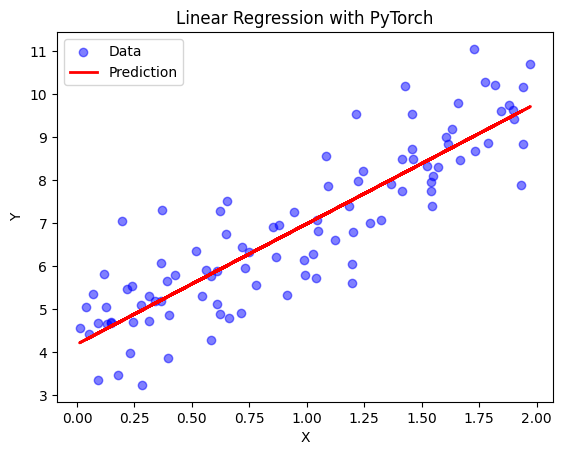

Trained Weight: 2.7969908714294434
Trained Bias: 4.184655666351318


In [18]:
import torch
import torch.nn as nn 
import torch.optim as optim

torch.manual_seed(42) 
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

linear_model = nn.Linear(in_features=1, out_features=1)
optimizer = optim.SGD(params = linear_model.parameters(), lr=1e-3)
loss_fc = nn.MSELoss()

for epoch in range(10000):
    loss = loss_fc(linear_model(X_tensor), y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"epoch : {epoch + 1}, Loss : {loss.item()}")

with torch.no_grad():
    y_pred = linear_model(X_tensor).numpy()

# 그래프 시각화
plt.scatter(X, y, color="blue", alpha=0.5, label="Data")  
plt.plot(X, y_pred, color="red", linewidth=2, label="Prediction")  
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression with PyTorch")
plt.show()

weight = linear_model.weight.item()  
bias = linear_model.bias.item()  

print(f"Trained Weight: {weight}")
print(f"Trained Bias: {bias}")